In [1]:
# Requirements
!pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, StackingClassifier, VotingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, roc_curve, roc_auc_score, auc, brier_score_loss
)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.inspection import permutation_importance

from matplotlib.colors import ListedColormap
import mpl_toolkits.mplot3d

# Global seaborn style
sns.set(style="whitegrid")
np.random.seed(42)

In [3]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df["species"] = df["target"].apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
# Dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [5]:
# Basic stats
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Summary statistics grouped by species
summary_stats = df.groupby("species").describe().T
display(summary_stats)

species                     setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.600000   6.225000
                  50%     5.000000    5.900000   6.500000
                  75%     5.200000    6.300000   6.900000
                  max     5.800000    7.000000   7.900000
sepal width (cm)  count  50.000000   50.000000  50.000000
                  mean    3.428000    2.770000   2.974000
                  std     0.379064    0.313798   0.322497
                  min     2.300000    2.000000   2.200000
                  25%     3.200000    2.525000   2.800000
                  50%     3.400000    2.800000   3.000000
                  75%     3.675000    3.000000   3.175000
                  max     4.400000    3.400000   3.800000
petal length (cm) count  50.000000   50.000000  50.000000
                  mean    1.462000    4.260000   5.552000
                  std     0.173664    0.469911   0.551895
                  min     1.000000    3.000000   4.500000
                  25%     1.400000    4.000000   5.100000
                  50%     1.500000    4.350000   5.550000
                  75%     1.575000    4.600000   5.875000
                  max     1.900000    5.100000   6.900000
petal width (cm)  count  50.000000   50.000000  50.000000
                  mean    0.246000    1.326000   2.026000
                  std     0.105386    0.197753   0.274650
                  min     0.100000    1.000000   1.400000
                  25%     0.200000    1.200000   1.800000
                  50%     0.200000    1.300000   2.000000
                  75%     0.300000    1.500000   2.300000
                  max     0.600000    1.800000   2.500000
target            count  50.000000   50.000000  50.000000
                  mean    0.000000    1.000000   2.000000
                  std     0.000000    0.000000   0.000000
                  min     0.000000    1.000000   2.000000
                  25%     0.000000    1.000000   2.000000
                  50%     0.000000    1.000000   2.000000
                  75%     0.000000    1.000000   2.000000
                  max     0.000000    1.000000   2.000000

In [7]:
# Basic class distribution counts
class_counts = df["species"].value_counts()
print("Class Distribution:\n", class_counts)

Class Distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


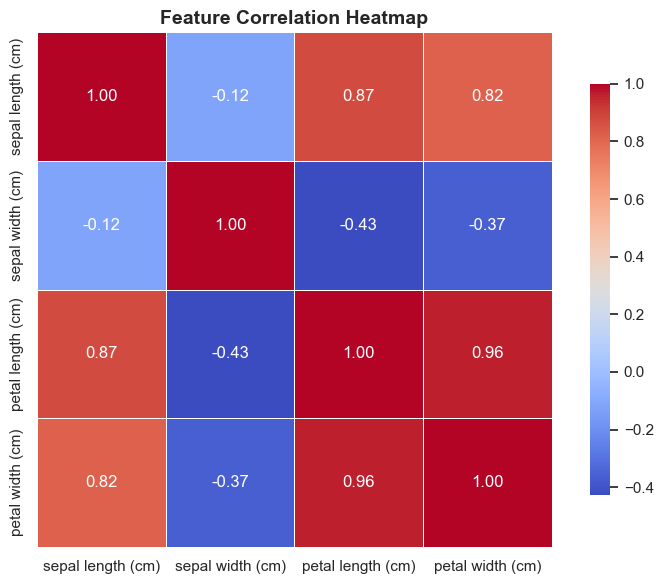

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))

corr = df[iris.feature_names].corr()

sns.heatmap(
    corr, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

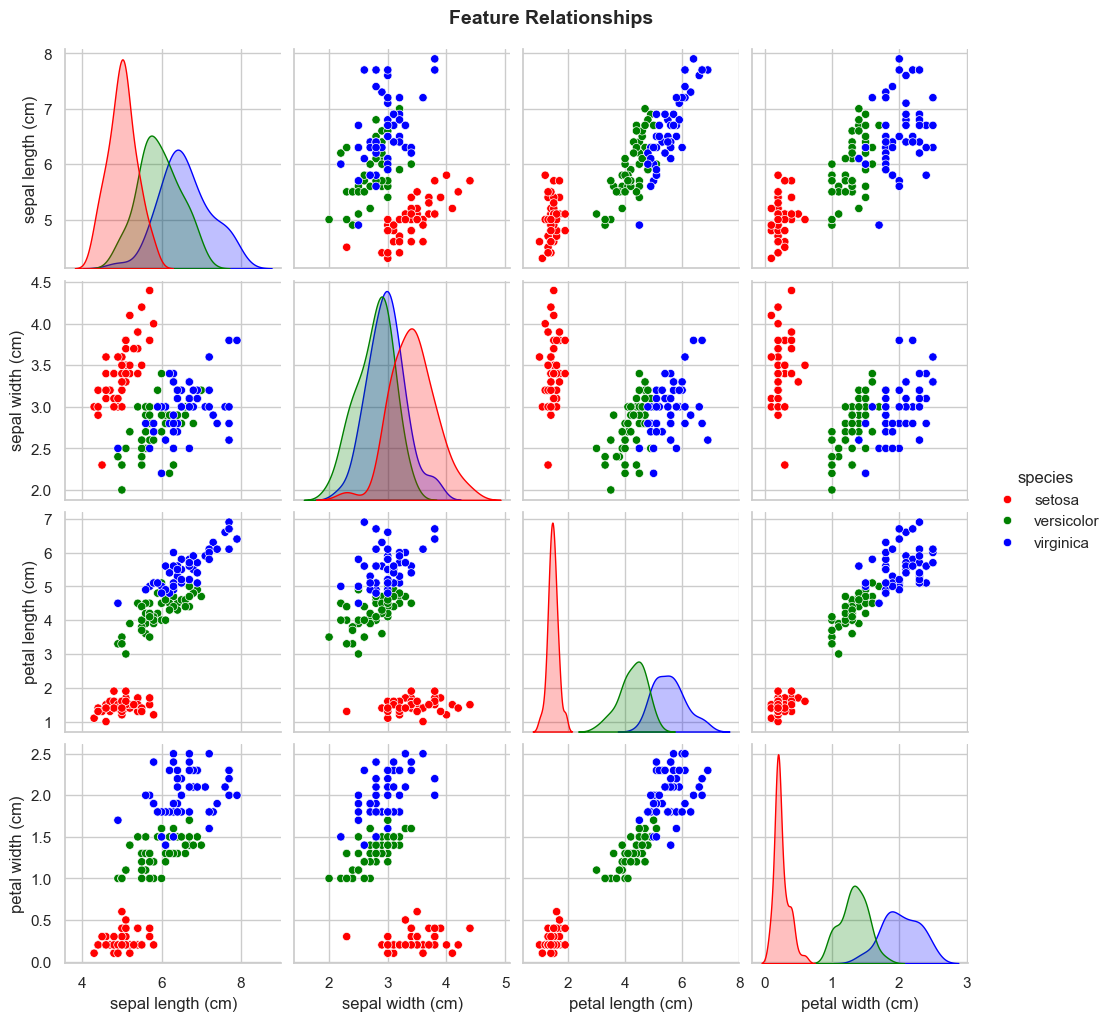

In [9]:
# Pairplot with target species
sns.pairplot(df.drop(columns="target"), hue="species", diag_kind="kde", palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'})
plt.suptitle("Feature Relationships", y=1.02, fontsize=14, fontweight='bold')
plt.show()

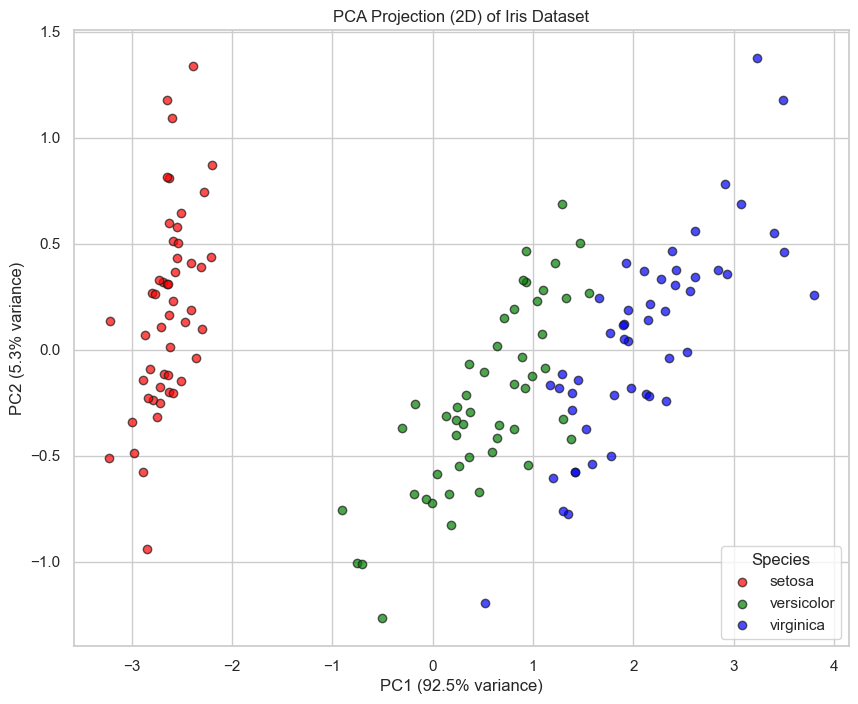

In [10]:
# PCA 2D projection
pca_2d = PCA(n_components=2)
X_proj = pca_2d.fit_transform(df[iris.feature_names])

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']

for i, label in enumerate(iris.target_names):
    plt.scatter(
        X_proj[df["target"] == i, 0],
        X_proj[df["target"] == i, 1],
        label=label,
        alpha=0.7,
        color=colors[i],
        edgecolor='k'  # add black border for better visibility
    )

plt.title("PCA Projection (2D) of Iris Dataset")
plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="Species")
plt.grid(True)
plt.show()

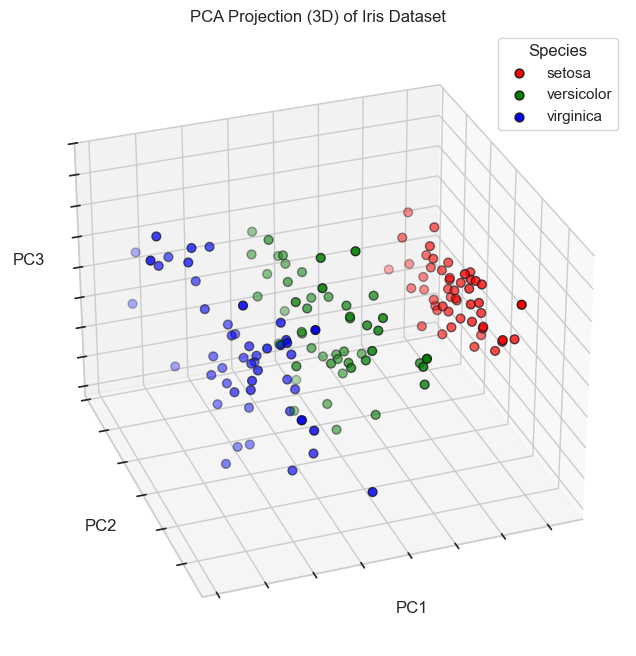

In [11]:
# PCA 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca_3d = PCA(n_components=3)
X_reduced = pca_3d.fit_transform(iris.data)

for i, label in enumerate(iris.target_names):
    ax.scatter(
        X_reduced[iris.target == i, 0],
        X_reduced[iris.target == i, 1],
        X_reduced[iris.target == i, 2],
        color=colors[i],
        label=label,
        s=40,
        edgecolor='k'  # black border for points
    )

ax.set_title("PCA Projection (3D) of Iris Dataset")
ax.set_xlabel(f"PC1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel(f"PC2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel(f"PC3")
ax.zaxis.set_ticklabels([])
ax.legend(title="Species")
plt.show()

In [12]:
# Train/Test Split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set : {X_test.shape[0]} samples")

Train set: 120 samples
Test set : 30 samples


In [13]:
# Identify column types
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

In [14]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [15]:
# List of base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=40, min_samples_split=10, max_depth=None),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM (RBF)": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(verbose=-1)
}

In [16]:
results = {}

for name, clf in base_models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Check if classifier supports probability output
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)

        # ROC AUC logic depending on binary or multi-class
        if y_proba.shape[1] == 2:  # Binary classification
            auc_score = roc_auc_score(y_test, y_proba[:, 1])
        else:  # Multi-class classification
            auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
    else:
        auc_score = None

    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "ROC_AUC": auc_score
    }

    print(f"{name}")
    print("Accuracy:", round(acc, 4))
    if auc_score is not None:
        print("ROC AUC:", round(auc_score, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)

Logistic Regression
Accuracy: 0.9667
ROC AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

------------------------------------------------------------
Random Forest
Accuracy: 0.9667
ROC AUC: 0.9883
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

--------------------------------

In [17]:
# Create results DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
results_df.style.background_gradient(cmap="YlGnBu")

,Accuracy,ROC_AUC
KNN,1.000000,1.000000
Logistic Regression,0.966667,1.000000
Random Forest,0.966667,0.988333
Gradient Boosting,0.966667,0.983333
Extra Trees,0.966667,0.993333
SVM (RBF),0.966667,0.996667
Naive Bayes,0.966667,0.990000
AdaBoost,0.933333,0.975000
Decision Tree,0.933333,0.950000
XGBoost,0.933333,0.965000


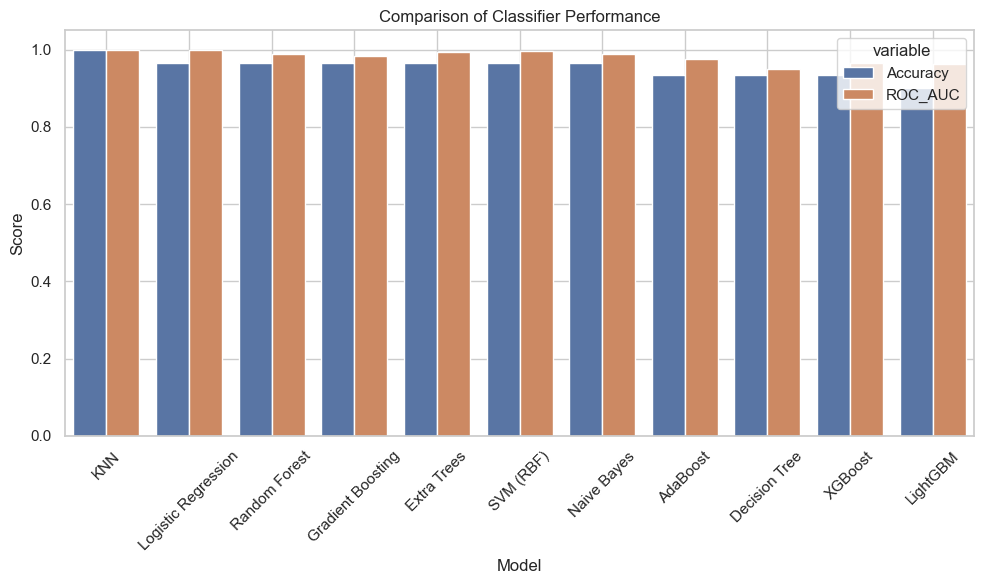

In [18]:
# Plot Accuracy and AUC for Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars="index"), x="index", y="value", hue="variable")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.xlabel("Model")
plt.title("Comparison of Classifier Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

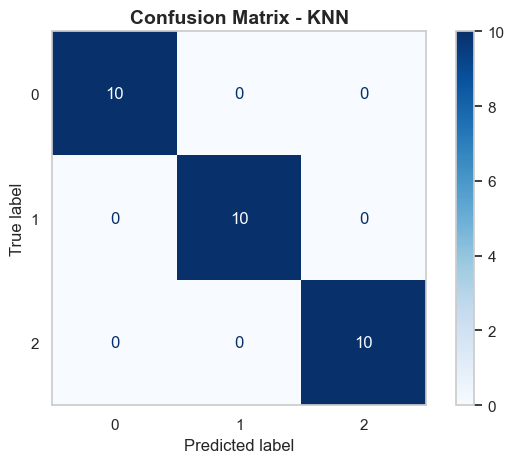

In [19]:
# Confusion Matrix
best_model_name = results_df.index[0]
best_model = base_models[best_model_name]
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, cmap="Blues", colorbar=True
)
plt.title(f"Confusion Matrix - {best_model_name}", fontsize=14, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

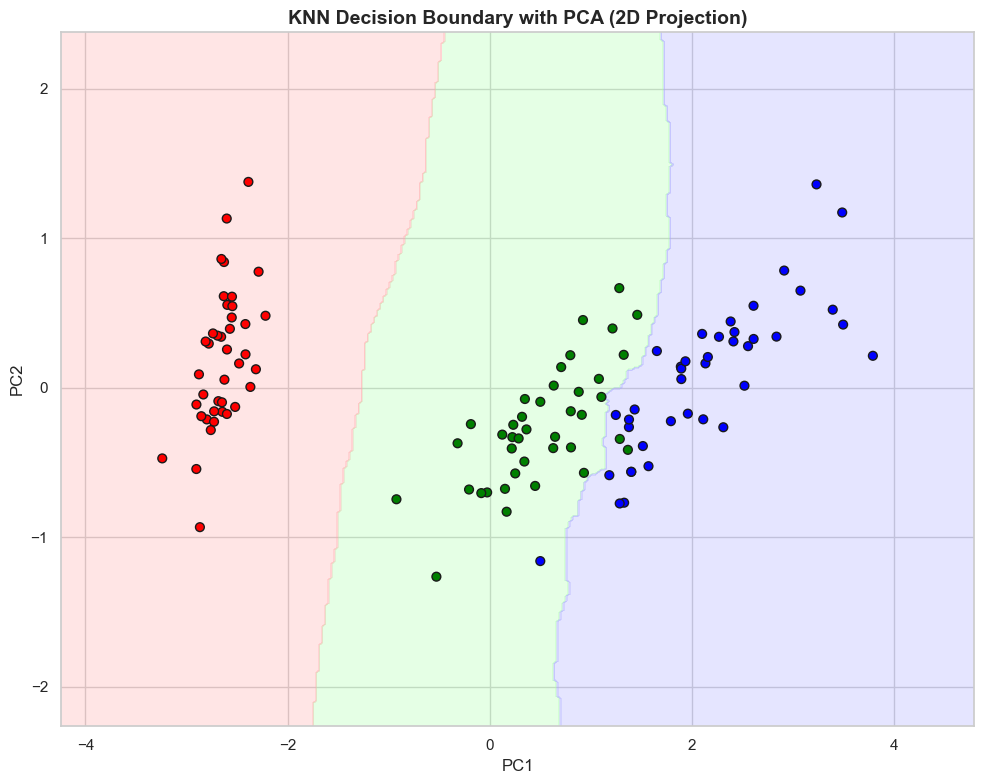

In [20]:
# PCA: reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Fit KNN classifier on 2D data
knn_2D = KNeighborsClassifier(n_neighbors=5)
knn_2D.fit(X_train_2D, y_train)

# Create meshgrid for decision boundary visualization
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colors consistent with previous plots
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # soft red, green, blue backgrounds
cmap_points = ListedColormap(['red', 'green', 'blue'])               # bright red, green, blue points

# Plot decision boundary and training points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=40)

plt.title("KNN Decision Boundary with PCA (2D Projection)", fontsize=14, fontweight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# New data: 9 realistic Iris flower samples
new_samples = pd.DataFrame({
    "sepal length (cm)": [5.1, 6.5, 7.2, 4.9, 6.0, 5.5, 6.3, 5.0, 7.1],
    "sepal width (cm)":  [3.5, 3.0, 3.6, 3.0, 2.2, 2.3, 2.5, 3.4, 3.0],
    "petal length (cm)":[1.4, 5.2, 6.1, 1.4, 5.0, 4.0, 4.9, 1.5, 5.9],
    "petal width (cm)": [0.2, 2.0, 2.5, 0.2, 1.5, 1.3, 1.8, 0.2, 2.1],
})

# Retrieve the best model from previous evaluation
best_model_name = results_df.index[0]
print(f"Best performing model: {best_model_name}")

# Use the already trained best model
best_model = base_models[best_model_name]

# Predict class labels
predictions = best_model.predict(new_samples)

# Predict class probabilities (if supported)
if hasattr(best_model, "predict_proba"):
    probabilities = best_model.predict_proba(new_samples)
else:
    probabilities = None

# Display predictions
print("\nPredictions for new Iris samples:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted class = {iris.target_names[pred]}")

# Display probability table if available
if probabilities is not None:
    print("\nPrediction Probabilities:")
    prob_df = pd.DataFrame(probabilities, columns=iris.target_names)
    display(prob_df)
else:
    print("This model does not support probability prediction.")

Best performing model: KNN

Predictions for new Iris samples:
Sample 1: Predicted class = setosa
Sample 2: Predicted class = virginica
Sample 3: Predicted class = virginica
Sample 4: Predicted class = setosa
Sample 5: Predicted class = versicolor
Sample 6: Predicted class = versicolor
Sample 7: Predicted class = virginica
Sample 8: Predicted class = setosa
Sample 9: Predicted class = virginica

Prediction Probabilities:


,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.6,0.4
5,0.0,1.0,0.0
6,0.0,0.4,0.6
7,1.0,0.0,0.0
8,0.0,0.0,1.0


In [22]:
# Create a full pipeline with preprocessing and model
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

# Fit the full pipeline to the training data
full_pipeline.fit(X_train, y_train)

# Export the full pipeline with pickle
now = datetime.datetime.now().strftime("%Y_%m_%d")
filename = f"best_model_Iris_Species_Classification_{best_model_name.replace(' ', '_')}_{now}.pkl"
with open(filename, "wb") as f:
    pickle.dump(full_pipeline, f)
print(f"Best model pipeline saved as: {filename}")

Best model pipeline saved as: best_model_Iris_Species_Classification_KNN_2025_07_21.pkl
